<a href="https://colab.research.google.com/github/luisArthurRodriguesDaSilva/estudo-dados-eleicoes/blob/master/PieRRestudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import seaborn as sns
import random
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import json
import folium

In [2]:
arraio = list(map(lambda x : random.randint(0,100),range(100)))

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/dados eleições/votacao_partido_munzona_2020_BRASIL.csv',sep=";",encoding='latin-1')

In [5]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
0,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,12,PDT,Partido Democrático Trabalhista,40000119180,PARTIDO ISOLADO,PDT,N,457,65
1,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,15,MDB,Movimento Democrático Brasileiro,250000087767,PARTIDO ISOLADO,MDB,N,1246,191
2,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,17,PSL,Partido Social Liberal,250000112022,PARTIDO ISOLADO,PSL,N,1142,14
3,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,22,PL,Partido Liberal,30000112069,PARTIDO ISOLADO,PL,N,1484,14
4,12/09/2022,03:24:25,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,...,Partido isolado,25,DEM,Democratas,210000069700,PARTIDO ISOLADO,DEM,N,407,37


In [6]:
queryPrimeiroTurno = dados[
    (dados['NR_TURNO'] == 1)
    &(dados['DS_CARGO'] == 'Prefeito')
]
querySegundoTurno = dados[
    (dados['NR_TURNO'] == 2)
    &(dados['DS_CARGO'] == 'Prefeito')
]
queryPrimeiroTurno.shape,querySegundoTurno.shape

((23393, 28), (687, 28))

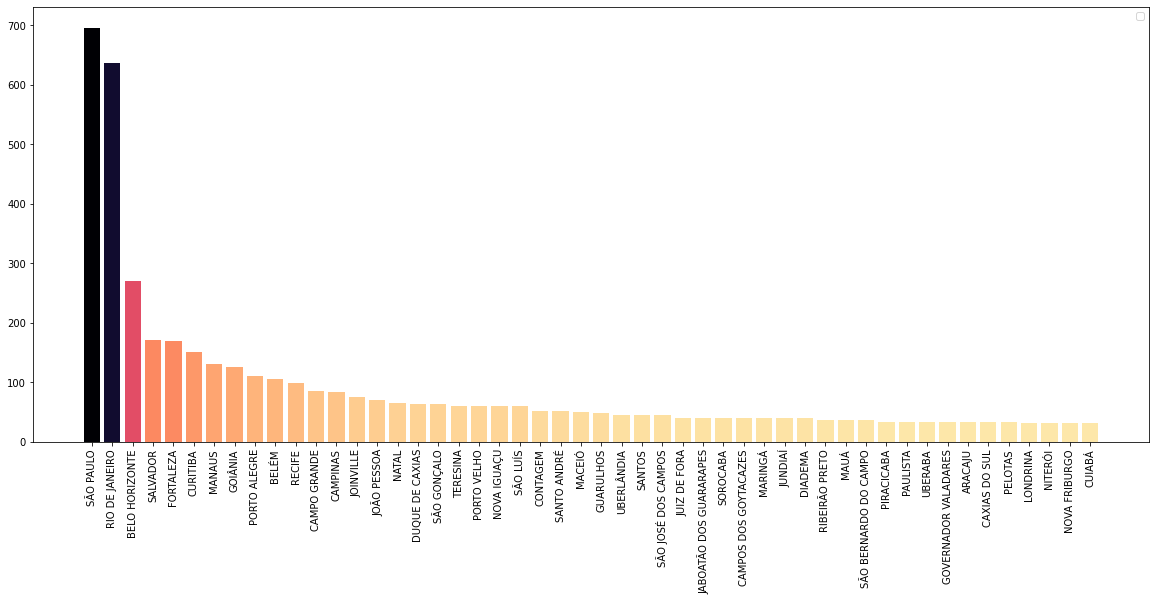

In [7]:
nm_urnas_primeiro_turno = queryPrimeiroTurno.groupby(by=['NM_MUNICIPIO']).agg(
    quantidade = ('DS_CARGO','count')
)

nm_urnas_primeiro_turno.sort_values('quantidade', inplace=True, ascending=False)



def showarQnt(data,color,extraFunctions=[]):
  fig, ax = plt.subplots()
  for i in extraFunctions:
    i(fig,ax)
  amostra = data['quantidade'].values[:50]
  colors = sns.color_palette(color,np.max(amostra+1))
  bar_colors = list(map(lambda num : colors[num],amostra))

  ax.bar( 
      data.index[:50], 
      data['quantidade'][:50],
      color=bar_colors[:50]
       )
  fig.set_size_inches(20,8)
  ax.legend()
  plt.rcParams.update({'font.size': 20})
  plt.xticks(rotation = 90)
  plt.show()

showarQnt(nm_urnas_primeiro_turno,'magma_r')

In [40]:
dados = queryPrimeiroTurno.drop(columns=
                        ['ANO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'CD_TIPO_ELEICAO',
                         'NM_TIPO_ELEICAO',
                         'NR_TURNO',
                         'CD_ELEICAO',
                         'DS_ELEICAO',
                         'TP_ABRANGENCIA',
                         'NM_TIPO_ELEICAO',
                         'DT_GERACAO',
                         'HH_GERACAO',
                         'DT_ELEICAO',
                         'CD_CARGO',
                         'ST_VOTO_EM_TRANSITO'
                         ])
dados.head()

,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
14,RS,88994,SAPIRANGA,88994,SAPIRANGA,131,Prefeito,Coligação,11,PP,PROGRESSISTAS,210000069668,TRABALHO E COMPROMISSO POR SAPIRANGA,PP / PTB,18285,0
38,PR,75744,ROSÁRIO DO IVAÍ,75744,ROSÁRIO DO IVAÍ,136,Prefeito,Coligação,55,PSD,Partido Social Democrático,160000089839,"UNIDOS COM A FORÇA DO POVO, UM NOVO TEMPO VAI ...",PSD / PSB / MDB,1002,0
43,BA,33430,ARAMARI,33430,ARAMARI,163,Prefeito,Partido isolado,13,PT,Partido dos Trabalhadores,50000092047,PARTIDO ISOLADO,PT,548,0
46,MG,48933,NOVA ERA,48933,NOVA ERA,193,Prefeito,Coligação,12,PDT,Partido Democrático Trabalhista,130000112253,OUVIR PRA GOVERNAR,MDB / PDT,3033,0
85,MG,53279,SERITINGA,53279,SERITINGA,6,Prefeito,Coligação,25,DEM,Democratas,130000145252,UNIDOS POR SERITINGA,PTB / PSDB / DEM,934,0


In [51]:
a.head()

,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,QT_VOTOS_NOMINAIS,QT_VOTOS_LEGENDA
14,RS,88994,SAPIRANGA,88994,SAPIRANGA,131,Prefeito,Coligação,11,PP,PROGRESSISTAS,210000069668,TRABALHO E COMPROMISSO POR SAPIRANGA,PP / PTB,18285,0
38,PR,75744,ROSÁRIO DO IVAÍ,75744,ROSÁRIO DO IVAÍ,136,Prefeito,Coligação,55,PSD,Partido Social Democrático,160000089839,"UNIDOS COM A FORÇA DO POVO, UM NOVO TEMPO VAI ...",PSD / PSB / MDB,1002,0
43,BA,33430,ARAMARI,33430,ARAMARI,163,Prefeito,Partido isolado,13,PT,Partido dos Trabalhadores,50000092047,PARTIDO ISOLADO,PT,548,0
46,MG,48933,NOVA ERA,48933,NOVA ERA,193,Prefeito,Coligação,12,PDT,Partido Democrático Trabalhista,130000112253,OUVIR PRA GOVERNAR,MDB / PDT,3033,0
85,MG,53279,SERITINGA,53279,SERITINGA,6,Prefeito,Coligação,25,DEM,Democratas,130000145252,UNIDOS POR SERITINGA,PTB / PSDB / DEM,934,0


In [ ]:
queryPrimeiroTurnoPI = dados[
    (dados['NR_TURNO'] == 1) & 
    (dados['DS_CARGO'] == 'Prefeito') &
    (dados['SG_UF'] == 'PI')
]

votosPorPartidoPI = queryPrimeiroTurnoPI[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoPI.sort_values('quantidade', inplace=True, ascending=False)
showarQnt(votosPorPartidoPI,'dark:salmon')

In [129]:
primeiroTurnoRR = dados[
    (dados['SG_UF'] == 'RR')
]

byMunicipio = primeiroTurnoRR.groupby(by=['NM_MUNICIPIO'] ).agg(
    votos=( 'QT_VOTOS_NOMINAIS', 'max'),
    partido=('SG_PARTIDO', lambda x: x.describe()[2]),
    nrPartido = ('NR_PARTIDO', lambda z:list(z)[0] )
)

byMunicipio

,votos,partido,nrPartido
NM_MUNICIPIO,,,
ALTO ALEGRE,3928,PSD,55
AMAJARI,1548,SOLIDARIEDADE,77
BOA VISTA,45957,PSL,17
BONFIM,5261,REPUBLICANOS,10
CANTÁ,5508,SOLIDARIEDADE,77
CARACARAÍ,4098,AVANTE,70
CAROEBE,2387,REPUBLICANOS,10
IRACEMA,2943,PROS,90
MUCAJAÍ,5405,PL,22


KeyError: ignored

In [ ]:
primeiroTurnoRR

In [121]:
url = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-14-mun.json'
rrGeoJson = requests.get(url).json()

In [123]:
  mapa = folium.Map(location=[-10, -30], zoom_start=4)

  mapa.choropleth(geo_data=rrGeoJson, data=df,
                  columns=['state','% Votos'],
                  key_on='properties.sigla',  # Check your GeoJSON for the name!
                  fill_color=color,
                  fill_opacity=0.7, 
                  line_opacity=0.2,legend_name=f'% de Votos para {candidate}')

  return mapa


NameError: ignored

In [ ]:

votosPorPartidoRR = queryPrimeiroTurnoRR[['SG_PARTIDO','QT_VOTOS_NOMINAIS','SG_UF']].groupby( by=['SG_PARTIDO'] ).agg(
    quantidade=( 'QT_VOTOS_NOMINAIS', 'sum')
)

votosPorPartidoRR.sort_values('quantidade', inplace=True, ascending=False)
def eF(plt,ax):
  ax.annotate(
    f'votos por partido RR',
    xy=(0.99, 0.94),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=14,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25 ),  
  )
showarQnt(votosPorPartidoRR,'dark:green',extraFunctions=[eF])